In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import plate_map as pm
from unidec_modules.ChromEng2 import *
from unidec_modules import unidectools as ud
from DataStructure import *
from dataclasses import dataclass

In [2]:
path = "C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\mzML\\mzML.mzML"
eng = ChromEngine()


UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


In [3]:
eng.load_mzml(path)

Opening HDF5 File: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.hdf5
Reading mzML: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done


True

In [4]:
eng.config.chrom_peak_width = 0.05
eng.get_chrom_peaks()

1070 2
Noise Level: 0.03357343719702872 Window: 0.05
Bad Peak [0.419567   0.30422294] 0.23768299999999998 [0.419567, 0.65725]
Bad Peak [0.602767   0.24142904] 0.24183299999999996 [0.419567, 0.6614]
0.702967 0.14128400000000008
0.790233 0.16205000000000003
1.0312 0.13711000000000007
1.95747 0.1411800000000003
2.88835 0.13712999999999997
Bad Peak [3.76958    0.03455761] 0.8769500000000003 [3.7197, 4.59665]
Bad Peak [4.23498    0.03712807] 0.6733000000000002 [3.91918, 4.59248]
Bad Peak [5.02062    0.03889817] 0.26602000000000015 [4.77123, 5.03725]


([array([0.702967  , 0.13838679]),
  array([0.790233  , 0.09750636]),
  array([1.0312    , 0.74873995]),
  array([1.95747   , 0.88543616]),
  array([2.88835, 1.     ])],
 [[0.686333, 0.827617],
  [0.682183, 0.844233],
  [1.00212, 1.13923],
  [1.9284, 2.06958],
  [2.85927, 2.9964]])

In [5]:
TIC_min = 1
tranges = eng.chrompeaks_tranges
eng.chrompeaks_tranges = [t for t in tranges if all(i > TIC_min for i in t)]
eng.chrompeaks_tranges

[[1.00212, 1.13923], [1.9284, 2.06958], [2.85927, 2.9964]]

In [6]:
eng.config.sw_scan_offset = 0 # ??? defaults to 10

eng.add_chrom_peaks2() # stores data from selected peaks ready for metaunidec processing

Getting scans: [98, 131]
Length merge axis: 28915
Getting scans: [321, 355]
Length merge axis: 30293
Getting scans: [545, 578]
Length merge axis: 31336


In [7]:
eng.config.subtype = 2 # background subtraction - subtract curved
eng.config.subbuff = 100 # background subtraction amount(subtract curved) 0 = 0ff, 100 = good amount when on
eng.config.datanorm = 0 # turn off data normalisation

# -- Deconvolution
eng.config.numit = 100 # number of iterations

# mass range (default = 5000.0 to 500000.0 Da)
eng.config.massub = 15000 # upper 
eng.config.masslb = 11000 # lower

eng.config.massbins = 0.1 # sample mass every 0.1 Da

# FWHM 
# eng.get_auto_peak_width()
eng.config.mzsig = 0 

# charge range
eng.config.startz = 1
eng.config.endz = 30

# smoothing 
eng.config.zzsig = 1 # charge smooth width (smooth charge state distributions)
eng.config.psig = 1 # smooth nearby points (point smooth width, some = 1)
eng.config.beta = 0 # suppress artifacts (beta, some = 50)

eng.config.psfun = 0 # Peak shape function (gaussian, lorentzian, split G/L)

# -- Peak Selection and plotting
eng.config.peaknorm = 0 # Normalise peaks (0 = off)
eng.config.datanorm = 0
eng.config.peakwindow = 10 # peak window / Da
eng.config.exnorm = 0 # extract normalisation
eng.config.peakthresh = 0.05
# eng.config.nativeub = 10
# eng.config.nativelb = -10

In [8]:
eng.data.export_hdf5()

In [9]:
eng.process_data()
eng.run_unidec()

Execution Time: 0.03922559999999997
Execution Time: 1.4850182000000007


{'Variable 1': 0, 'Variable 2': 0, 'beta': array([0.], dtype=float32), 'error': array([1.5117859e+10], dtype=float32), 'iterations': array([99]), 'length_mass': array([40000]), 'length_mz': array([28915]), 'mzsig': array([0.], dtype=float32), 'name': '1.00212', 'psig': array([1.], dtype=float32), 'rsquared': array([0.99012554], dtype=float32), 'scanend': 131, 'scanmid': 114.5, 'scanstart': 98, 'time': array([0.461], dtype=float32), 'timeend': 1.13923, 'timemid': 1.070675, 'timestart': 1.00212, 'uniscore': array([0.91778815], dtype=float32), 'zsig': array([1.], dtype=float32)}
~


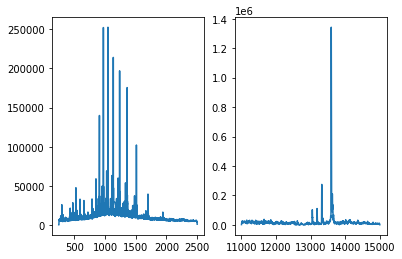

{'Variable 1': 0, 'Variable 2': 0, 'beta': array([0.], dtype=float32), 'error': array([2.295656e+10], dtype=float32), 'iterations': array([99]), 'length_mass': array([39990]), 'length_mz': array([30293]), 'mzsig': array([0.], dtype=float32), 'name': '1.9284', 'psig': array([1.], dtype=float32), 'rsquared': array([0.99028623], dtype=float32), 'scanend': 355, 'scanmid': 338.0, 'scanstart': 321, 'time': array([0.481], dtype=float32), 'timeend': 2.06958, 'timemid': 1.99899, 'timestart': 1.9284, 'uniscore': array([0.9273079], dtype=float32), 'zsig': array([1.], dtype=float32)}
~


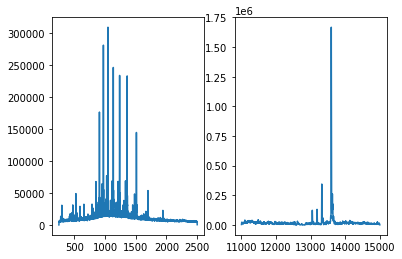

{'Variable 1': 0, 'Variable 2': 0, 'beta': array([0.], dtype=float32), 'error': array([2.029854e+10], dtype=float32), 'iterations': array([99]), 'length_mass': array([40000]), 'length_mz': array([31336]), 'mzsig': array([0.], dtype=float32), 'name': '2.85927', 'psig': array([1.], dtype=float32), 'rsquared': array([0.9938575], dtype=float32), 'scanend': 578, 'scanmid': 561.5, 'scanstart': 545, 'time': array([0.495], dtype=float32), 'timeend': 2.9964, 'timemid': 2.927835, 'timestart': 2.85927, 'uniscore': array([0.938569], dtype=float32), 'zsig': array([1.], dtype=float32)}
~


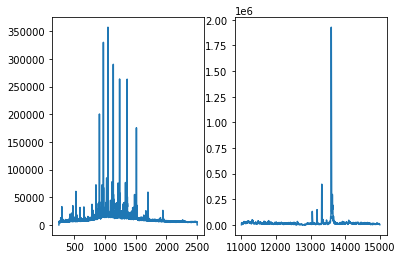

In [10]:
for s in eng.data.spectra: 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    raw = s.rawdata
    massd = s.massdat
    ax1.plot(raw[:, 0], raw[:, 1])
    ax2.plot(massd[:, 0], massd[:, 1])
    print(s.attrs)
    
    print("~")
    plt.show()

In [11]:
eng.pick_peaks()

Execution Time: 0.07502629999999932
Peak info saved to: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\UniDec_Figures_and_Files\mzML_extracts.txt


In [12]:
# ub, lb = eng.peakwindow, eng.peakwindow

# zarea = []
# for p in eng.pks.peaks:
#     p.integralrange = [p.mass + lb, p.mass+ub]
#     p.integral = ud.integrate(eng)
eng.config.peakwindow

10

In [13]:
# define species 
species1 = Species(mass = 13321, name = 'protein1')
species2 = Species(mass = 13595, name = 'protein2')
species3 = Species(mass =111, name = 'protein1')
reaction = Reaction('test_reaction')

In [14]:
rxn = [species1, species2, species3]
fltr = [i for i in rxn if i.name == 'protein1']
fltr

[Species(mass=13321, name='protein1', area=None, intensity=None, timepoint=None),
 Species(mass=111, name='protein1', area=None, intensity=None, timepoint=None)]

In [15]:
pd.DataFrame(rxn)

,mass,name,area,intensity,timepoint
0,13321,protein1,None,None,None
1,13595,protein2,None,None,None
2,111,protein1,None,None,None


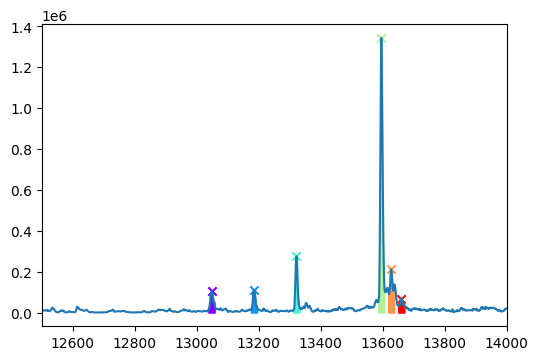

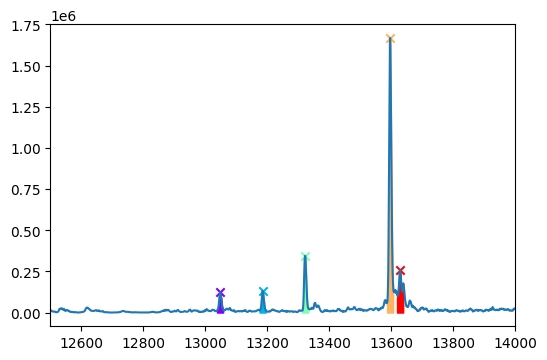

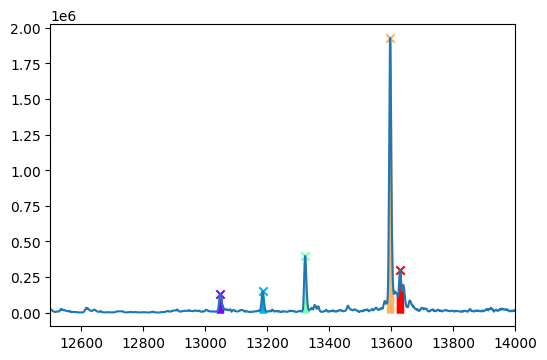

In [16]:
spectra_pks = {}

spectra_integrals = {}
lb, ub = -eng.config.peakwindow, eng.config.peakwindow

for s in eng.data.spectra:
    
    peak_integrals = []
    
    plt.figure(dpi=100)
    plt.plot(s.massdat[:, 0], s.massdat[:, 1])
    
#     print(s.name)
    
    
    for p in s.pks.peaks:
        
        p.integralrange = [p.mass+lb, p.mass+ub]
        
        ints = (ud.integrate(s.massdat, p.integralrange[0], p.integralrange[1]))
        peak_integrals.append((ints))
        
        plt.scatter(p.mass, p.height, marker = 'x', color = p.color)
        plt.xlim(12500, 14000)
        plt.fill_between(ints[1][:, 0], ints[1][:, 1], color = p.color)
#         print(p.mass)
        
        
    spectra_integrals[s.name] = peak_integrals
    
    
    

    plt.show()


In [35]:
rheaders = {"Reaction Name":str, "Species":str, "Concentration":float,
           "Units":str, "Mass":float, "Reagent Type":str, "Sequence":str}

pheaders = {"Well ID":{'dtype':str, 'long':True, 'short_row': False, 'short_col':False}, 
            "Type":{'dtype':str, 'long':True, 'short_row': True, 'short_col':True}, 
            "Reaction Name":{'dtype':str, 'long':True, 'short_row': True, 'short_col':True}, 
            "Time":{'dtype':str, 'long':True, 'short_row': True, 'short_col':True}}

map_name = "plate map uni chrom update.xlsx"



rmap = pd.read_excel(map_name, 
                     dtype = rheaders, index_col = "Species",
                     sheet_name = "reaction map")

pdata_types = {i[0]: i[1]['dtype'] for i in pheaders.items()} 
pmap = pd.read_excel(map_name, dtype = pdata_types, index_col = "Well ID", skiprows = 1)
pmap


,Type,Reaction Name,Time
Well ID,,,
A1,Test,17-05-21-CTB1,0
A2,Test,17-05-21-CTB1,30
A3,Test,17-05-21-CTB1,60
B1,Test,17-05-21-CTB2,0
B2,Test,17-05-21-CTB2,30
B3,Test,17-05-21-CTB2,60


In [149]:
pheaders2 = [x for x in pheaders.keys() if pheaders[x]['long']]
pmapdf = pm.empty_map(size = 6, header_names = pheaders)
pmapdf.update(pmap)
pmapdf

,Type,Reaction Name,Time,Valid
A1,Test,17-05-21-CTB1,0,True
A2,Test,17-05-21-CTB1,30,True
A3,Test,17-05-21-CTB1,60,True
B1,Test,17-05-21-CTB2,0,True
B2,Test,17-05-21-CTB2,30,True
B3,Test,17-05-21-CTB2,60,True


In [188]:
reactions = {key:[val] for key, val in rmap.groupby('Reaction Name')}
wellsflt = {key: val for key, val in pmapdf.groupby('Reaction Name')} 
for k, v in wellsflt.items():
    reactions[k].append(v)

In [187]:
wellsflt

{'17-05-21-CTB1': [    Type  Reaction Name Time  Valid
  A1  Test  17-05-21-CTB1    0   True
  A2  Test  17-05-21-CTB1   30   True
  A3  Test  17-05-21-CTB1   60   True],
 '17-05-21-CTB2': [    Type  Reaction Name Time  Valid
  B1  Test  17-05-21-CTB2    0   True
  B2  Test  17-05-21-CTB2   30   True
  B3  Test  17-05-21-CTB2   60   True]}

In [194]:
# separate each time point (or other variable?) in each reaction within the platemap
platemapdict = {}
for key, val in wellsflt.items():
    timegroup = val.groupby('Time')
    # where key is reaction, k is the time point and 
    # v is the dataframe row containing the metadata from the plate map
    platemapdict[key] = {float(k):v.iloc for k, v in timegroup} 
platemapdict['17-05-21-CTB1'][0]

{'A1': {'Type': 'Test',
  'Reaction Name': '17-05-21-CTB1',
  'Time': '0',
  'Valid': True}}

In [67]:
@dataclass
class Timepoint:
    time:float
    species:list = None
    spectra:list = None
    

In [179]:
times = {}
for k, v in reactions.items():
    valid_filter = v[1]['Valid'] == True
    timesgroup = v[1][valid_filter].groupby('Time')
    times[k] = {float(key):[val, v[0]] for key, val in timesgroup}
    
    print({key: val for key, val in timesgroup})

{'0':     Type  Reaction Name Time  Valid
A1  Test  17-05-21-CTB1    0   True, '30':     Type  Reaction Name Time  Valid
A2  Test  17-05-21-CTB1   30   True, '60':     Type  Reaction Name Time  Valid
A3  Test  17-05-21-CTB1   60   True}
{'0':     Type  Reaction Name Time  Valid
B1  Test  17-05-21-CTB2    0   True, '30':     Type  Reaction Name Time  Valid
B2  Test  17-05-21-CTB2   30   True, '60':     Type  Reaction Name Time  Valid
B3  Test  17-05-21-CTB2   60   True}


In [ ]:
times = {}
for k, v in reactions.items():
    valid_filter = v[1]['Valid'] == True
    timesgroup = v[1][valid_filter].groupby('Time')
    
    
    
    times[k] = {float(key):[val, v[0]] for key, val in timesgroup}
    
    print({key: val for key, val in timesgroup})

In [178]:
fff = (times['17-05-21-CTB1'][30][0])
fff.iloc[0]['Time']

'30'

In [145]:
pheaders

{'Well ID': {'dtype': str,
  'long': True,
  'short_row': False,
  'short_col': False},
 'Type': {'dtype': str, 'long': True, 'short_row': True, 'short_col': True},
 'Reaction Name': {'dtype': str,
  'long': True,
  'short_row': True,
  'short_col': True},
 'Time': {'dtype': str, 'long': True, 'short_row': True, 'short_col': True}}